# <p style="font-family: Arial; font-size:1.4em;color:green;"> Saudi Arabia Real Estate Price Prediction </p>

# <p style="font-family: Arial; font-size:1em;color:blue;"> Import of libraries </p>

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

# <p style="font-family: Arial; font-size:1em;color:blue;"> Loading the data </p>

I will start with trying to open the csv file, which was obtain using such tool as PyCharm and its plugin for working with SQLite files. As the only way possible was to download the file without headings, I need to add a row with headings and save such csv file.

In [72]:
file_path = '/Users/leodanilov/Downloads/Listings.csv'
df = pd.read_csv(file_path)

/var/folders/qj/f7ng8fvn4fg2pj2h7wc6s4940000gn/T/ipykernel_8365/126558949.py:2: DtypeWarning: Columns (0,1,2,3,5,6,18,20,21,23,25,26,29,30,31,33,36,37,38,41,42,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [73]:
# Assign the column names
column_names = [
    "user_id", "id", "uri", "title", "price", "content", "imgs", 
    "refresh", "category", "beds", "livings", "wc",
    "area", "type", "street_width", "age", "last_update", 
    "street_direction", "ketchen", "ac", "furnished", "location.lat", 
    "location.lng", "path", "user.review", "user.img", "user_name", 
    "user_phone", "user.iam_verified", "user.rega_id", "native.logo", 
    "native.title", "native.image", "native.description", 
    "native.external_url", "rent_period", "city", "city_id", 
    "district", "district_id", "width", "length", "advertiser_type", 
    "create_time", "has_extended_details", "daily_rentable", 
    "createdAt", "updatedAt"
]

In [74]:
df.columns = column_names

In [75]:
# Save the updated DataFrame to a CSV file
base, filename = os.path.split(file_path)
new_filename = "updated_" + filename
new_file_path = os.path.join(base, new_filename)
df.to_csv(new_file_path, index=False)

In [76]:
print(f"Updated CSV file saved to {new_file_path}")

Updated CSV file saved to /Users/leodanilov/Downloads/updated_Listings.csv


Let's look at the initial dataset and output all the necessary information about it.

In [77]:
df = pd.read_csv(new_file_path, header=0, delimiter=',', quotechar='"', on_bad_lines='skip')

df.head()

/var/folders/qj/f7ng8fvn4fg2pj2h7wc6s4940000gn/T/ipykernel_8365/1873547991.py:1: DtypeWarning: Columns (0,1,2,3,5,6,18,20,21,23,25,26,29,30,31,33,36,37,38,41,42,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(new_file_path, header=0, delimiter=',', quotechar='"', on_bad_lines='skip')


,user_id,id,uri,title,price,content,imgs,refresh,category,beds,...,district,district_id,width,length,advertiser_type,create_time,has_extended_details,daily_rentable,createdAt,updatedAt
0,11005,4837,طريق-الملك-عبدالله-بن-عبدالعزيز-الفرعي-المغرزا...,أرض للبيع في طريق الملك عبدالله بن عبدالعزيز ا...,15078000.0,الارض على طريق الملك عبدالله على شارعين مظاهره...,"[""000000000_1627687181813.jpg""]",1.672041e+09,2.0,0.0,...,حي المغرزات,566.0,NaN,NaN,NaN,1.416054e+09,NaN,0.0,2023-01-01 14:52:38.169 +00:00,2023-01-01 14:52:38.169 +00:00
1,8017,5498,5-المملكة-العربية-السعودية-5498,أرض للبيع في 5 المملكة العربية السعودية,8057700.0,الارض استثماريه في محافظة البرك طريق جده جازان...,"[""506610555_1417214243205.jpg"",""506610555_1417...",1.671819e+09,2.0,0.0,...,حي الروضة,4100.0,NaN,NaN,NaN,1.417220e+09,NaN,0.0,2023-01-01 15:01:52.351 +00:00,2023-01-01 15:01:52.351 +00:00
2,13810,6520,شارع-Saher-Al-Garbee-St-ذهبان,"أرض للإيجار في شارع الهزاعية, حي العشيرية, جدة",50000.0,السلام عليكم ورحمة الله وبركاته\nوكل عام وانتم...,"[""504121665_1418232181483.jpg"",""504121665_1418...",1.672190e+09,15.0,0.0,...,حي الرياض,3490.0,20.0,20.0,NaN,1.418233e+09,NaN,0.0,2023-01-01 14:43:23.326 +00:00,2023-01-01 14:43:23.326 +00:00
3,5234,8847,طريق-الملك-خالد-حي-الثقبة-الخبر-الخبر-8847,أرض للبيع في طريق الملك خالد ، حي الثقبة ، الخ...,3000000.0,ارض للبيع لبناء شقق فندقيه او عمارات سكنيه خلف...,"[""567772202_1632148243568.png"",""000052346_1661...",1.672253e+09,2.0,0.0,...,حي الثقبة,1060.0,NaN,NaN,NaN,1.420233e+09,NaN,0.0,2023-01-01 14:38:46.004 +00:00,2023-01-01 14:38:46.004 +00:00
4,18243,8968,الدار-البيضاء-الرياض-8968,"أرض للبيع في الدار البيضاء, الرياض",1050000.0,٢٥ م على الشارع X ٣٥ م الى الداخل\nرقم القطعة ...,"[""000000000_1627687184850.jpg"",""505234537_1420...",1.671878e+09,2.0,0.0,...,حي الدار البيضاء,424.0,NaN,NaN,NaN,1.420307e+09,NaN,0.0,2023-01-01 15:00:23.159 +00:00,2023-01-01 15:00:23.159 +00:00


In [78]:
print(df.shape)

(778753, 48)


# <p style="font-family: Arial; font-size:1em;color:blue;"> EDA </p>

In [79]:
print(df.dtypes)

user_id                  object
id                       object
uri                      object
title                    object
price                   float64
content                  object
imgs                     object
refresh                 float64
category                float64
beds                    float64
livings                 float64
wc                      float64
area                    float64
type                    float64
street_width            float64
age                     float64
last_update             float64
street_direction        float64
ketchen                  object
ac                      float64
furnished                object
location.lat             object
location.lng            float64
path                     object
user.review             float64
user.img                 object
user_name                object
user_phone              float64
user.iam_verified       float64
user.rega_id             object
native.logo              object
native.t

In [80]:
print(df.describe())

              price       refresh       category           beds  \
count  6.804450e+05  6.639450e+05  663940.000000  411339.000000   
mean   3.891433e+06  1.676801e+09       4.148881       4.273653   
std    6.180110e+07  8.206769e+06       4.057668       1.465409   
min    1.000000e+00  0.000000e+00       1.000000       0.000000   
25%    2.860000e+05  1.672395e+09       2.000000       3.000000   
50%    9.500000e+05  1.674821e+09       3.000000       4.000000   
75%    2.000000e+06  1.680793e+09       6.000000       5.000000   
max    1.000000e+10  1.691173e+09      23.000000     100.000000   

             livings            wc          area           type  \
count  411827.000000  4.098200e+05  6.633660e+05  161174.000000   
mean        1.724105  2.049677e+04  5.686042e+03       1.458647   
std         1.039643  5.867010e+06  2.156660e+05       0.758162   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         1.000000  3.000000e+00  2.040000e+02       1.0000

In [81]:
print(df.isnull().sum())

user_id                      0
id                       98307
uri                      98305
title                    98326
price                    98308
content                 114183
imgs                    171030
refresh                 114808
category                114813
beds                    367414
livings                 366926
wc                      368933
area                    115387
type                    617579
street_width            133794
age                     367936
last_update             114808
street_direction        209697
ketchen                 392614
ac                      670705
furnished               353758
location.lat            114808
location.lng            114808
path                    114808
user.review             232875
user.img                355103
user_name               121627
user_phone              114813
user.iam_verified       118527
user.rega_id            453134
native.logo             778749
native.title            778746
native.i

Highly Incomplete Columns:
1. native.logo (524290 nulls out of 524294 rows) - Almost entirely empty.
2. native.title (524287 nulls) - Almost entirely empty.
3. native.image (524289 nulls) - Almost entirely empty.
4. native.description (524287 nulls) - Almost entirely empty.
5. native.external_url (524289 nulls) - Almost entirely empty.
6. type (418347 nulls) - A large proportion of missing data.
7. ketchen (289835 nulls) - Significant proportion missing.
8. ac (474527 nulls) - Significant proportion missing.

Potentially Less Relevant Columns:
1. uri (98305 nulls) - Represents URLs, not typically useful unless you need to refer to the listing.
2. path (115834 nulls) - Similar to uri.
3. user.img (258007 nulls) - Image related to the user, not needed for general analysis.
4. user.rega_id (318379 nulls) - A specific ID, useful only for specific integrations.
5. has_extended_details (523032 nulls) - Primarily false, indicating lack of extended details.
6. daily_rentable (206890 nulls) - Depending on your focus, but likely redundant if you are not focusing on rental frequency.
7. user.iam_verified (117744 nulls) - Relevant only if filtering based on user verification.

Low Relevance for Specific Analysis:
1. user.review (177630 nulls) - User reviews might not be central to many property analyses.
2. advertiser_type (123378 nulls) - Might be redundant if not focusing on user type.

I will drop all the columns with features, which seem completely irrelevant to the target variable.

In [82]:
columns_to_drop = [
    'user_id', 'native.logo', 'native.title', 'native.image', 
    'native.description', 'native.external_url',
    'user.img', 'uri', 'path', 'user_name', 'user_phone', 
    'createdAt', 'updatedAt', 'create_time', 'imgs',
    'has_extended_details', 'rent_period', 'type', 'ac',
    'content'
]

df.drop(columns=columns_to_drop, axis=1, inplace=True)

df

,id,title,price,refresh,category,beds,livings,wc,area,street_width,...,user.iam_verified,user.rega_id,city,city_id,district,district_id,width,length,advertiser_type,daily_rentable
0,4837,أرض للبيع في طريق الملك عبدالله بن عبدالعزيز ا...,15078000.0,1.672041e+09,2.0,0.0,0.0,0.0,1077.0,80.0,...,1.0,NaN,الرياض,21,حي المغرزات,566.0,NaN,NaN,NaN,0.0
1,5498,أرض للبيع في 5 المملكة العربية السعودية,8057700.0,1.671819e+09,2.0,0.0,0.0,0.0,23022.0,15.0,...,1.0,NaN,محايل,92,حي الروضة,4100.0,NaN,NaN,NaN,0.0
2,6520,"أرض للإيجار في شارع الهزاعية, حي العشيرية, جدة",50000.0,1.672190e+09,15.0,0.0,0.0,0.0,400.0,35.0,...,1.0,5907435,جدة,66,حي الرياض,3490.0,20.0,20.0,NaN,0.0
3,8847,أرض للبيع في طريق الملك خالد ، حي الثقبة ، الخ...,3000000.0,1.672253e+09,2.0,0.0,0.0,0.0,870.0,15.0,...,1.0,922293,الخبر,12,حي الثقبة,1060.0,NaN,NaN,NaN,0.0
4,8968,"أرض للبيع في الدار البيضاء, الرياض",1050000.0,1.671878e+09,2.0,0.0,0.0,0.0,875.0,30.0,...,1.0,NaN,الرياض,21,حي الدار البيضاء,424.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778748,5490437,فيلا للبيع في شارع وادي طواء ، حي اليمامة ، ال...,650000.0,1.691172e+09,3.0,7.0,3.0,5.0,245.0,NaN,...,1.0,NaN,الرياض,21,حي اليمامة,636.0,9.0,27.0,owner,NaN
778749,5490438,أرض للبيع في الخبر,1120350.0,1.691173e+09,2.0,NaN,NaN,NaN,679.0,15.0,...,1.0,NaN,الخبر,12,حي البحر,1048.0,679.0,1.0,normal_marketer,NaN
778750,5490440,أرض للبيع في شارع 11ب ، حي الكوثر ، الخبر ، الخبر,850000.0,1.691173e+09,2.0,NaN,NaN,NaN,875.0,15.0,...,1.0,NaN,الخبر,12,حي الكوثر,1100.0,875.0,1.0,normal_marketer,NaN
778751,5490442,أرض للبيع في شارع الاحرار ، حي البحر ، الخبر ،...,4848900.0,1.691173e+09,2.0,NaN,NaN,NaN,2309.0,40.0,...,1.0,NaN,الخبر,12,حي البحر,1048.0,2309.0,1.0,exclusive_marketer,NaN


In [83]:
print(df.isnull().sum())

id                    98307
title                 98326
price                 98308
refresh              114808
category             114813
beds                 367414
livings              366926
wc                   368933
area                 115387
street_width         133794
age                  367936
last_update          114808
street_direction     209697
ketchen              392614
furnished            353758
location.lat         114808
location.lng         114808
user.review          232875
user.iam_verified    118527
user.rega_id         453134
city                 114808
city_id              114808
district             114808
district_id          114813
width                172257
length               172449
advertiser_type      138739
daily_rentable       430301
dtype: int64


# <p style="font-family: Arial; font-size:1em;color:blue;"> NaN Replacement </p>

In [84]:
df = df.dropna(subset=['title', 'id', 'price', 'location.lat', 'location.lng'])

In [85]:
trend_cols = ['beds', 'livings', 'age', 'ketchen', 'furnished', 'wc']

numerical_cols = ['beds', 'livings', 'area', 'street_width', 'age', 'width', 'length']

categorical_cols = ['category', 'street_direction', 'ketchen', 'furnished', 'user.review', 'user.iam_verified', 'user.rega_id', 'advertiser_type', 'daily_rentable']
# As I've noticed a trend that when category is 2 or 15, which means that it is just a land for selling or renting accordingly, there are no wcs, bedrooms, livings and etc.
df.loc[(df['category'] == 2) | (df['category'] == 15), trend_cols] = df.loc[(df['category'] == 2) | (df['category'] == 15), trend_cols].fillna(0)

for col in numerical_cols:
    try:
        df.loc[:, col] = pd.to_numeric(df[col], errors='coerce')  # Try to convert the column to numeric
    except ValueError:
        print(f"Skipping column '{col}' as it contains non-numeric data.")
        continue  # Skip the current column and continue with the next column

    median_values = df.groupby('district')[col].transform('median')
    df.loc[:, col] = df[col].fillna(median_values)

for col in categorical_cols:
    mode_values = df.groupby('district')[col].apply(lambda x: x.mode().dropna().iloc[0] if not x.mode().dropna().empty else np.nan)
    df.loc[:, col] = df[col].fillna(mode_values)

# Check for missing values again
missing_values_after = df.isnull().sum()
print("\nКоличество оставшихся пропущенных значений по каждому столбцу:")
print(missing_values_after[missing_values_after > 0])

/Users/leodanilov/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/leodanilov/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/leodanilov/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/leodanilov/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/leodanilov/opt/anaconda3/envs/newenv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/leodanil


Количество оставшихся пропущенных значений по каждому столбцу:
category                  2
beds                     39
livings                  39
wc                    54426
area                      2
street_width              2
age                      27
street_direction      94887
ketchen               78031
furnished             39282
user.review          118055
user.iam_verified      3716
user.rega_id         338313
district_id               2
width                    10
length                   10
advertiser_type       23929
daily_rentable       315484
dtype: int64


In [86]:
# Print the DataFrame to verify the changes
df

,id,title,price,refresh,category,beds,livings,wc,area,street_width,...,user.iam_verified,user.rega_id,city,city_id,district,district_id,width,length,advertiser_type,daily_rentable
0,4837,أرض للبيع في طريق الملك عبدالله بن عبدالعزيز ا...,15078000.0,1.672041e+09,2.0,0.0,0.0,0.0,1077.0,80.0,...,1.0,NaN,الرياض,21,حي المغرزات,566.0,23.0,25.0,NaN,0.0
1,5498,أرض للبيع في 5 المملكة العربية السعودية,8057700.0,1.671819e+09,2.0,0.0,0.0,0.0,23022.0,15.0,...,1.0,NaN,محايل,92,حي الروضة,4100.0,20.0,25.0,NaN,0.0
2,6520,"أرض للإيجار في شارع الهزاعية, حي العشيرية, جدة",50000.0,1.672190e+09,15.0,0.0,0.0,0.0,400.0,35.0,...,1.0,5907435,جدة,66,حي الرياض,3490.0,20.0,20.0,NaN,0.0
3,8847,أرض للبيع في طريق الملك خالد ، حي الثقبة ، الخ...,3000000.0,1.672253e+09,2.0,0.0,0.0,0.0,870.0,15.0,...,1.0,922293,الخبر,12,حي الثقبة,1060.0,15.0,16.0,NaN,0.0
4,8968,"أرض للبيع في الدار البيضاء, الرياض",1050000.0,1.671878e+09,2.0,0.0,0.0,0.0,875.0,30.0,...,1.0,NaN,الرياض,21,حي الدار البيضاء,424.0,14.0,23.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778748,5490437,فيلا للبيع في شارع وادي طواء ، حي اليمامة ، ال...,650000.0,1.691172e+09,3.0,7.0,3.0,5.0,245.0,15.0,...,1.0,NaN,الرياض,21,حي اليمامة,636.0,9.0,27.0,owner,NaN
778749,5490438,أرض للبيع في الخبر,1120350.0,1.691173e+09,2.0,0.0,0.0,0.0,679.0,15.0,...,1.0,NaN,الخبر,12,حي البحر,1048.0,679.0,1.0,normal_marketer,NaN
778750,5490440,أرض للبيع في شارع 11ب ، حي الكوثر ، الخبر ، الخبر,850000.0,1.691173e+09,2.0,0.0,0.0,0.0,875.0,15.0,...,1.0,NaN,الخبر,12,حي الكوثر,1100.0,875.0,1.0,normal_marketer,NaN
778751,5490442,أرض للبيع في شارع الاحرار ، حي البحر ، الخبر ،...,4848900.0,1.691173e+09,2.0,0.0,0.0,0.0,2309.0,40.0,...,1.0,NaN,الخبر,12,حي البحر,1048.0,2309.0,1.0,exclusive_marketer,NaN


In [87]:
#I've decided to drop the following columns 'user.rega_id' and 'daily_rentable' as they have too many NaN values and it is nearly impossible to predict their values correctly.
df.drop(columns=['user.rega_id', 'daily_rentable'], axis=1, inplace=True)

/var/folders/qj/f7ng8fvn4fg2pj2h7wc6s4940000gn/T/ipykernel_8365/4093195186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['user.rega_id', 'daily_rentable'], axis=1, inplace=True)


In [88]:
#let's drop all the Na's from the data
df.dropna(inplace=True)

/var/folders/qj/f7ng8fvn4fg2pj2h7wc6s4940000gn/T/ipykernel_8365/326131758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [89]:
df['ketchen'] = df['ketchen'].astype(float)
df['furnished'] = df['furnished'].astype(float)

/var/folders/qj/f7ng8fvn4fg2pj2h7wc6s4940000gn/T/ipykernel_8365/1555706010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ketchen'] = df['ketchen'].astype(float)
/var/folders/qj/f7ng8fvn4fg2pj2h7wc6s4940000gn/T/ipykernel_8365/1555706010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['furnished'] = df['furnished'].astype(float)


In [90]:
print(df.shape)

(396234, 26)


In [91]:
# Output unique possible values for 'kitchen'
print("Unique possible values for 'ketchen':")
print(df['ketchen'].unique())

# Output unique possible values for 'furnished'
print("\nUnique possible values for 'furnished':")
print(df['furnished'].unique())

# Output unique possible values for 'beds'
print("\nUnique possible values for 'beds':")
print(df['beds'].unique())

# Output unique possible values for 'livings'
print("\nUnique possible values for 'livings':")
print(df['livings'].unique())

# Output unique possible values for 'wc'
print("\nUnique possible values for 'wc':")
print(df['wc'].unique())

# Output unique possible values for 'street_direction'
print("\nUnique possible values for'street_direction':")
print(df['street_direction'].unique())

# Output unique possible values for 'advertiser_type'
print("\nUnique possible values for 'advertiser_type':")
print(df['advertiser_type'].unique())

Unique possible values for 'ketchen':
[1. 0.]

Unique possible values for 'furnished':
[0. 1.]

Unique possible values for 'beds':
[5. 0. 7. 3. 4. 6. 2. 1.]

Unique possible values for 'livings':
[1. 0. 2. 3. 5. 4. 7. 6.]

Unique possible values for 'wc':
[5. 0. 3. 2. 4. 1.]

Unique possible values for'street_direction':
[ 1.  7.  3.  2.  4.  9.  5. 10.  6.  8.]

Unique possible values for 'advertiser_type':
['exclusive_marketer' 'agent' 'normal_marketer' 'owner']


In [92]:
df

,id,title,price,refresh,category,beds,livings,wc,area,street_width,...,location.lng,user.review,user.iam_verified,city,city_id,district,district_id,width,length,advertiser_type
2248,2343359,بيت للبيع في شارع احمد الخفاجي ، حي سلطانة ، ا...,300000.0,1.671092e+09,9.0,5.0,1.0,5.0,185.0,10.0,...,46.692066,4.86,1.0,الرياض,21,حي سلطانة,672.0,15.0,20.0,exclusive_marketer
2252,2344888,أرض للبيع في طريق الكورنيش ، حي المرجان ، جدة ...,9900000.0,1.674911e+09,2.0,0.0,0.0,0.0,1800.0,35.0,...,39.095947,4.61,1.0,جدة,66,حي المرجان,3584.0,25.0,35.0,exclusive_marketer
2264,2351083,أرض للإيجار في شارع الغرارة ، حي القادسية ، ال...,400000.0,1.672495e+09,15.0,0.0,0.0,0.0,2400.0,30.0,...,46.817600,4.56,1.0,الرياض,21,حي القادسية,530.0,48.0,50.0,agent
2265,2351089,أرض للبيع في طريق الامير عبدالرحمن بن سعود ، ح...,3060000.0,1.671728e+09,2.0,0.0,0.0,0.0,1800.0,40.0,...,46.554234,4.35,1.0,الرياض,21,حي طويق,682.0,12.0,20.0,normal_marketer
2267,2351195,فيلا للبيع في شارع ابن المغازلي ، حي الملز ، ا...,1300000.0,1.671999e+09,3.0,7.0,2.0,5.0,660.0,10.0,...,46.740837,4.86,1.0,الرياض,21,حي الملز,568.0,20.0,23.0,agent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778744,5490433,أرض للبيع في حي ورقان ، المدينة المنورة ، امار...,550000.0,1.691172e+09,2.0,0.0,0.0,0.0,391.0,20.0,...,39.524965,4.56,1.0,المدينة المنورة,41,حي ورقان,3088.0,20.0,28.0,agent
778747,5490436,أرض للبيع في الدمام,1250000.0,1.691172e+09,2.0,0.0,0.0,0.0,625.0,20.0,...,50.213308,4.58,1.0,الدمام,18,حي جامعة الدمام,1314.0,25.0,25.0,agent
778749,5490438,أرض للبيع في الخبر,1120350.0,1.691173e+09,2.0,0.0,0.0,0.0,679.0,15.0,...,50.224922,5.00,1.0,الخبر,12,حي البحر,1048.0,679.0,1.0,normal_marketer
778750,5490440,أرض للبيع في شارع 11ب ، حي الكوثر ، الخبر ، الخبر,850000.0,1.691173e+09,2.0,0.0,0.0,0.0,875.0,15.0,...,50.117142,5.00,1.0,الخبر,12,حي الكوثر,1100.0,875.0,1.0,normal_marketer


In [93]:
# Calculating unique, null, and empty values for each column
summary = pd.DataFrame(index=df.columns)

# Number of unique values
summary['Unique Values'] = df.nunique()

# Number of null values
summary['Null Values'] = df.isnull().sum()

# Total number of rows for percentage calculation
total_rows = len(df)

In [94]:
summary

,Unique Values,Null Values
id,396234,0
title,116969,0
price,27028,0
refresh,317154,0
category,21,0
beds,8,0
livings,8,0
wc,6,0
area,6374,0
street_width,110,0


As a result, we have a DataFrame which consists of 396234 full rows and 26 columns

# <p style="font-family: Arial; font-size:1em;color:blue;"> Categorical Variables Transformation. Part 1 </p>

In [95]:
# Define the bins and labels
bins = [0, 1.99, 3.00, 3.99, 5.00]
labels = ['Bad', 'Normal', 'Good', 'Great']

# Use .cut to categorize 'user.review' and assign it directly within the DataFrame
df['review_category'] = pd.cut(df['user.review'], bins=bins, labels=labels, include_lowest=True)

# Define the mapping based on the order of the categories
review_category_mapping = {'Bad': 1, 'Normal': 2, 'Good': 3, 'Great': 4}

# Apply the mapping to the DataFrame
df['review_category'] = df['review_category'].map(review_category_mapping)

# Print the updated DataFrame
df

/var/folders/qj/f7ng8fvn4fg2pj2h7wc6s4940000gn/T/ipykernel_8365/2285487318.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_category'] = pd.cut(df['user.review'], bins=bins, labels=labels, include_lowest=True)
/var/folders/qj/f7ng8fvn4fg2pj2h7wc6s4940000gn/T/ipykernel_8365/2285487318.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_category'] = df['review_category'].map(review_category_mapping)


,id,title,price,refresh,category,beds,livings,wc,area,street_width,...,user.review,user.iam_verified,city,city_id,district,district_id,width,length,advertiser_type,review_category
2248,2343359,بيت للبيع في شارع احمد الخفاجي ، حي سلطانة ، ا...,300000.0,1.671092e+09,9.0,5.0,1.0,5.0,185.0,10.0,...,4.86,1.0,الرياض,21,حي سلطانة,672.0,15.0,20.0,exclusive_marketer,4
2252,2344888,أرض للبيع في طريق الكورنيش ، حي المرجان ، جدة ...,9900000.0,1.674911e+09,2.0,0.0,0.0,0.0,1800.0,35.0,...,4.61,1.0,جدة,66,حي المرجان,3584.0,25.0,35.0,exclusive_marketer,4
2264,2351083,أرض للإيجار في شارع الغرارة ، حي القادسية ، ال...,400000.0,1.672495e+09,15.0,0.0,0.0,0.0,2400.0,30.0,...,4.56,1.0,الرياض,21,حي القادسية,530.0,48.0,50.0,agent,4
2265,2351089,أرض للبيع في طريق الامير عبدالرحمن بن سعود ، ح...,3060000.0,1.671728e+09,2.0,0.0,0.0,0.0,1800.0,40.0,...,4.35,1.0,الرياض,21,حي طويق,682.0,12.0,20.0,normal_marketer,4
2267,2351195,فيلا للبيع في شارع ابن المغازلي ، حي الملز ، ا...,1300000.0,1.671999e+09,3.0,7.0,2.0,5.0,660.0,10.0,...,4.86,1.0,الرياض,21,حي الملز,568.0,20.0,23.0,agent,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778744,5490433,أرض للبيع في حي ورقان ، المدينة المنورة ، امار...,550000.0,1.691172e+09,2.0,0.0,0.0,0.0,391.0,20.0,...,4.56,1.0,المدينة المنورة,41,حي ورقان,3088.0,20.0,28.0,agent,4
778747,5490436,أرض للبيع في الدمام,1250000.0,1.691172e+09,2.0,0.0,0.0,0.0,625.0,20.0,...,4.58,1.0,الدمام,18,حي جامعة الدمام,1314.0,25.0,25.0,agent,4
778749,5490438,أرض للبيع في الخبر,1120350.0,1.691173e+09,2.0,0.0,0.0,0.0,679.0,15.0,...,5.00,1.0,الخبر,12,حي البحر,1048.0,679.0,1.0,normal_marketer,4
778750,5490440,أرض للبيع في شارع 11ب ، حي الكوثر ، الخبر ، الخبر,850000.0,1.691173e+09,2.0,0.0,0.0,0.0,875.0,15.0,...,5.00,1.0,الخبر,12,حي الكوثر,1100.0,875.0,1.0,normal_marketer,4


# <p style="font-family: Arial; font-size:1em;color:blue;"> Data Visualization </p>

In [96]:
#As there are too many districts 
district_counts = df['district'].value_counts()
print(district_counts.shape)
city_counts = df['city'].value_counts()
print(city_counts.shape)

(975,)
(96,)


In [97]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_columns = df.select_dtypes(include=numerics)

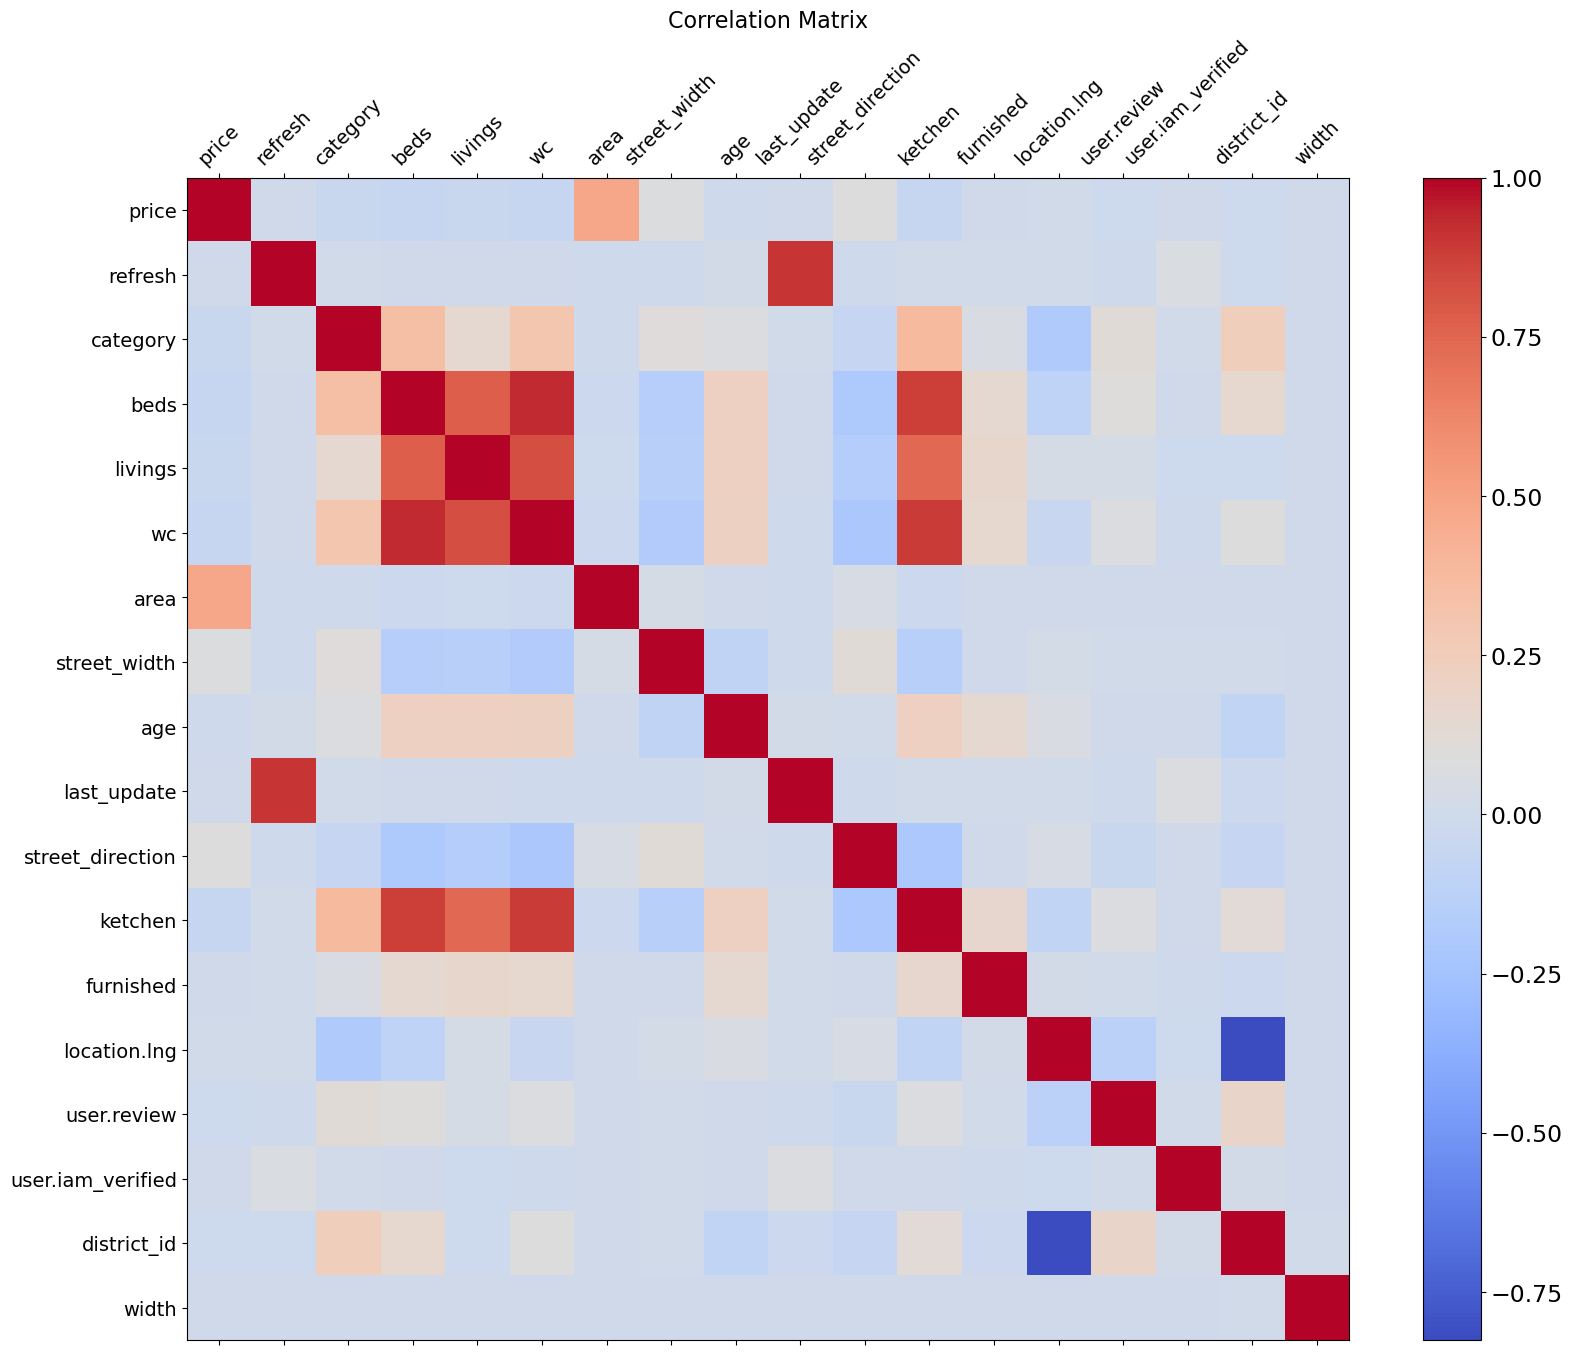

In [98]:
f = plt.figure(figsize=(19, 15))
plt.matshow(num_columns.corr(), cmap='coolwarm', fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=17)
plt.title('Correlation Matrix', fontsize=16);
plt.savefig('/Users/leodanilov/Downloads/CorrMat.png', bbox_inches='tight')

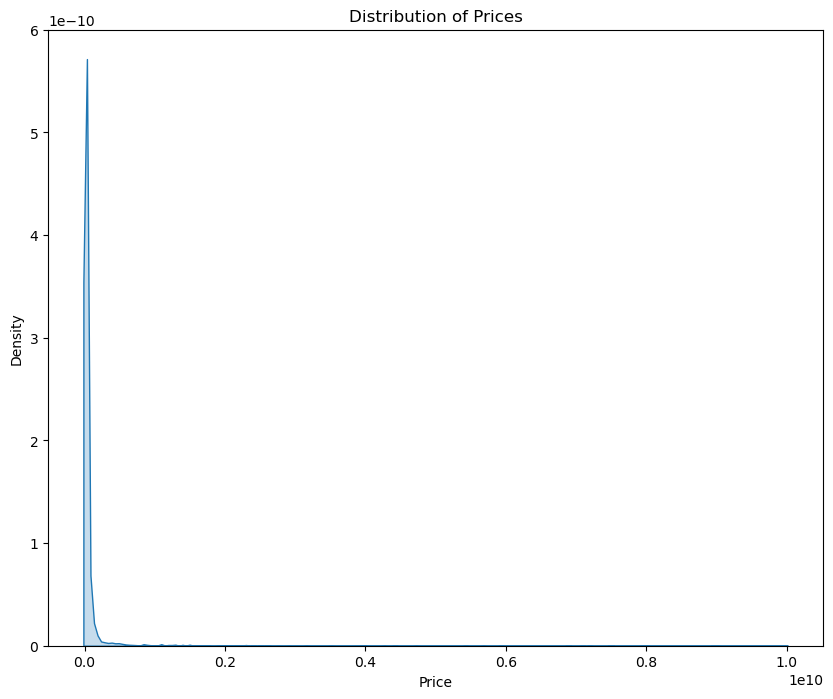

<Figure size 640x480 with 0 Axes>

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.kdeplot(df['price'], fill=True)  # 'fill=True' fills the area under the density curve
plt.title('Distribution of Prices')
plt.xlabel('Price')
# plt.xlim()  # Set the limits of the x-axis
plt.show()
plt.savefig('/Users/leodanilov/Downloads/price_distribution.png', bbox_inches='tight')

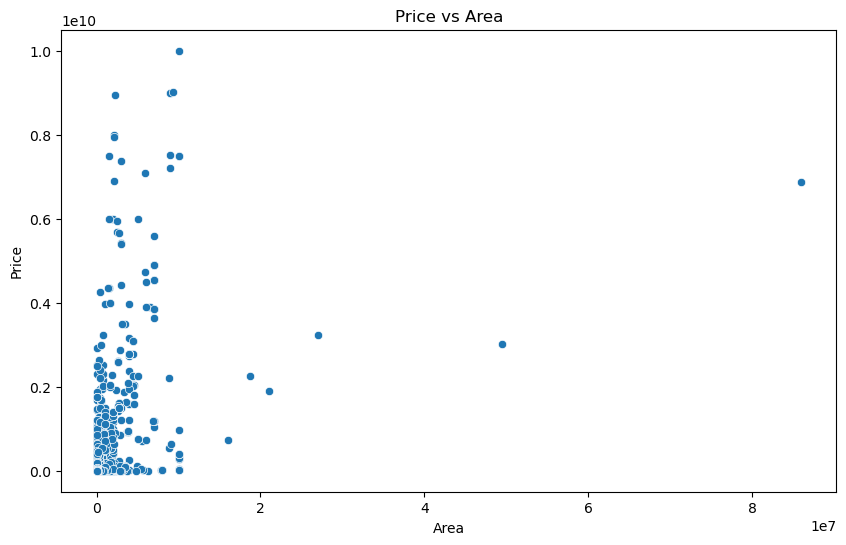

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

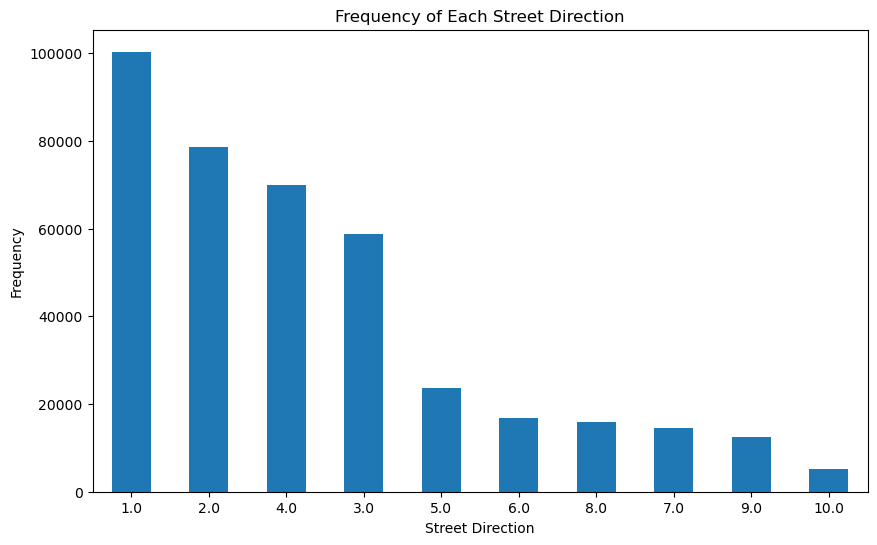

In [101]:
direction_counts = df['street_direction'].value_counts()

plt.figure(figsize=(10, 6))
direction_counts.plot(kind='bar')
plt.title('Frequency of Each Street Direction')
plt.xlabel('Street Direction')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Ensures direction labels are horizontal
plt.show()


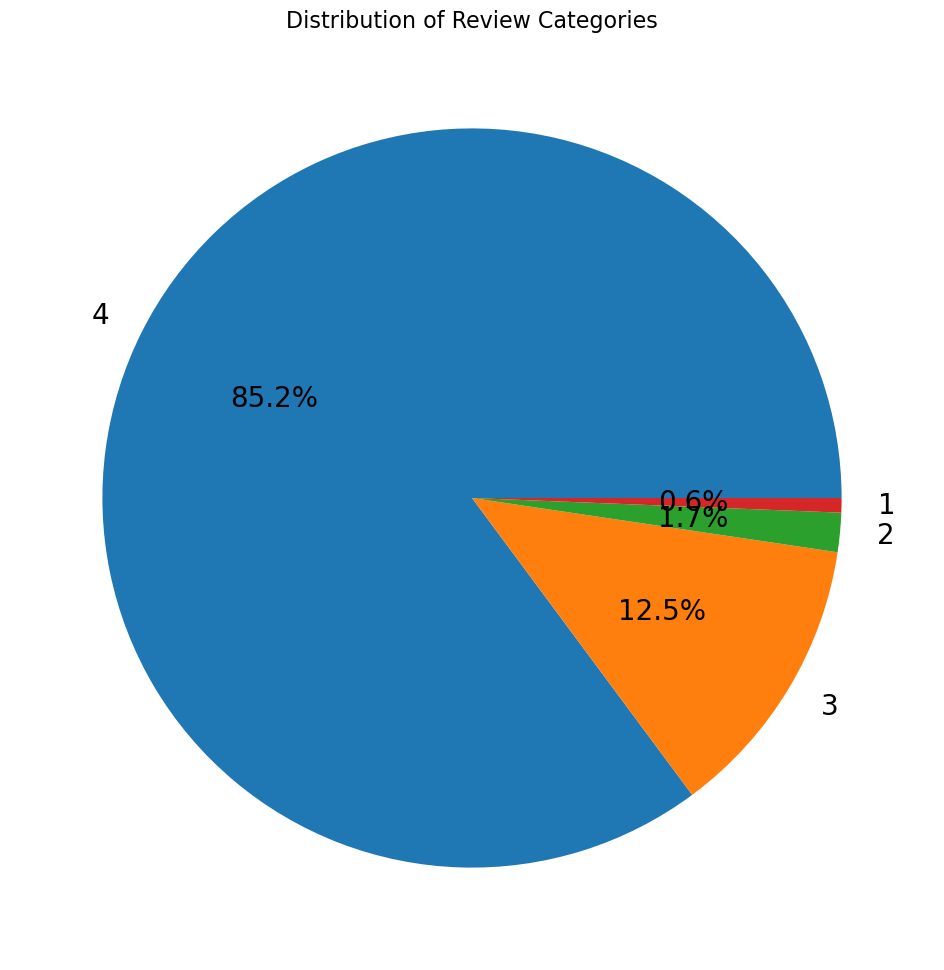

In [102]:
# Distribution of review_category
review_category_counts = df['review_category'].value_counts()

# Pie chart for distribution of review_category
plt.figure(figsize=(12, 12))
plt.pie(review_category_counts, labels=review_category_counts.index, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.title('Distribution of Review Categories', fontsize=16)
plt.show()

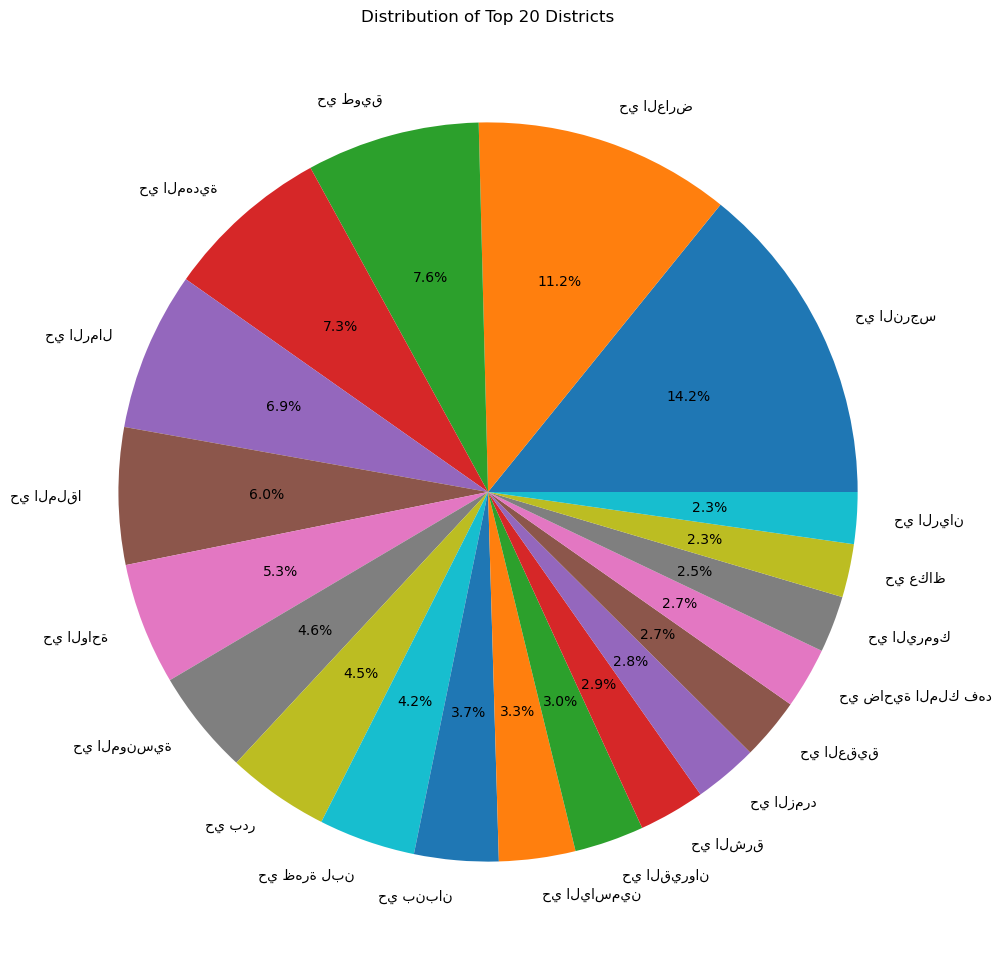

In [103]:
# Distribution of districts
district_counts = df['district'].value_counts()

# Get the top 20 districts as there are too many districts, to be concise, 975 different ones. 
top_20_districts = district_counts.nlargest(20)

# Converting the counts to percentages
district_percentages = (top_20_districts / top_20_districts.sum()) * 100

# Pie chart of the 
plt.figure(figsize=(12, 12))
plt.pie(district_percentages, labels=district_percentages.index, autopct='%1.1f%%')
plt.title('Distribution of Top 20 Districts')
plt.savefig('/Users/leodanilov/Downloads/districts_distribution.png', bbox_inches='tight')
plt.show()

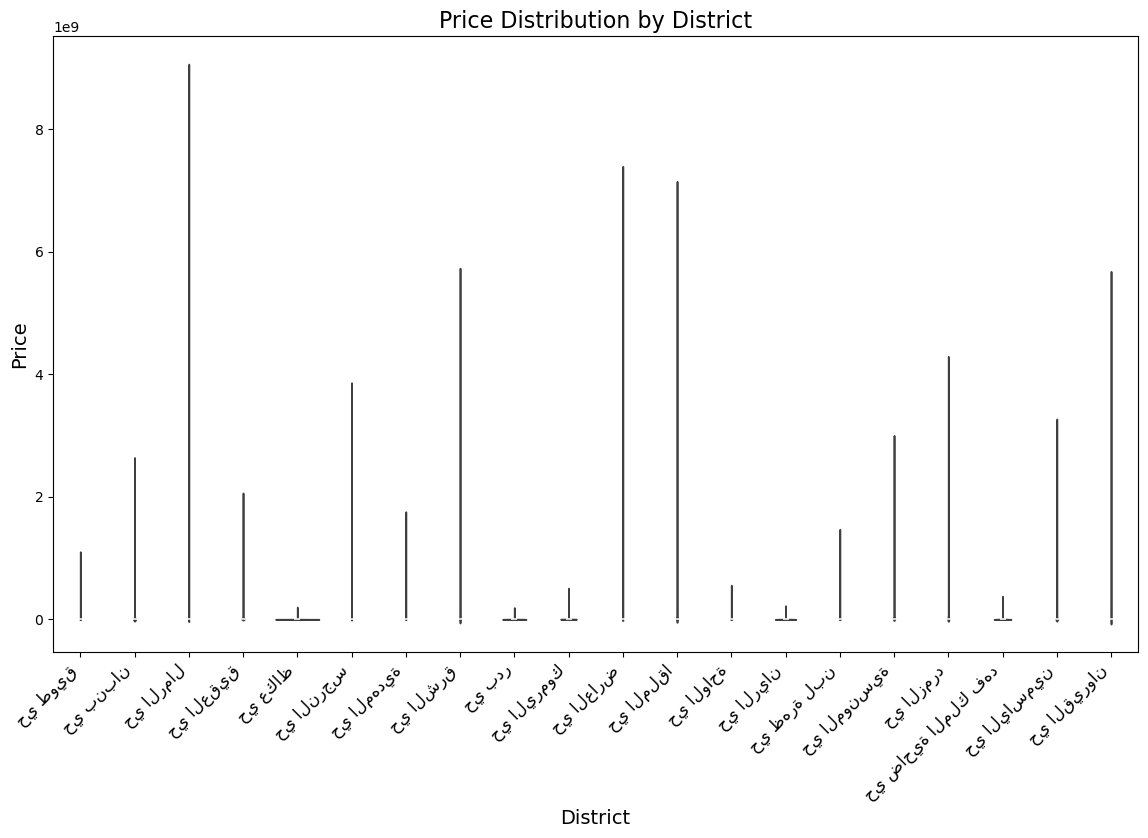

In [104]:
# Calculate top 20 districts by frequency
top_districts = df['district'].value_counts().nlargest(20).index

# Filter the DataFrame to include only the top 20 districts
temp_df = df[df['district'].isin(top_districts)]

# Create the violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='district', y='price', data=temp_df)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Adjust text alignment and size
plt.xlabel('District', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price Distribution by District', fontsize=16)
plt.show()

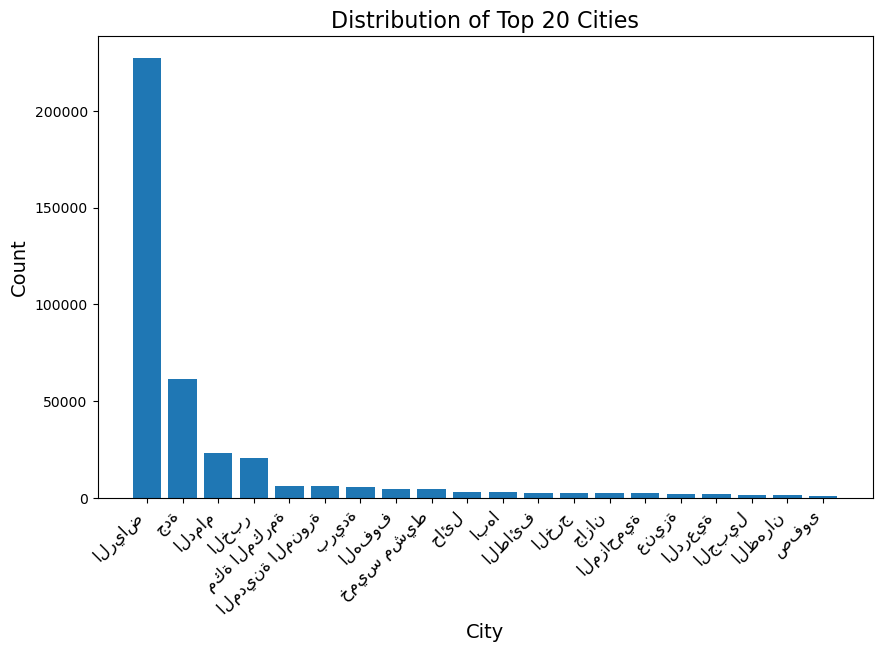

In [105]:
# Distribution of cities
city_counts = df['city'].value_counts()

# Getting top 20 cities as there are 96 and the graph won't be readable
top_20_cities = city_counts.nlargest(20)

# Histogram of the distribution of top 20 cities
plt.figure(figsize=(10, 6))
plt.bar(top_20_cities.index, top_20_cities.values)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('City', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Top 20 Cities', fontsize=16)
plt.savefig('/Users/leodanilov/Downloads/cities_distribution.png', bbox_inches='tight')
plt.show()

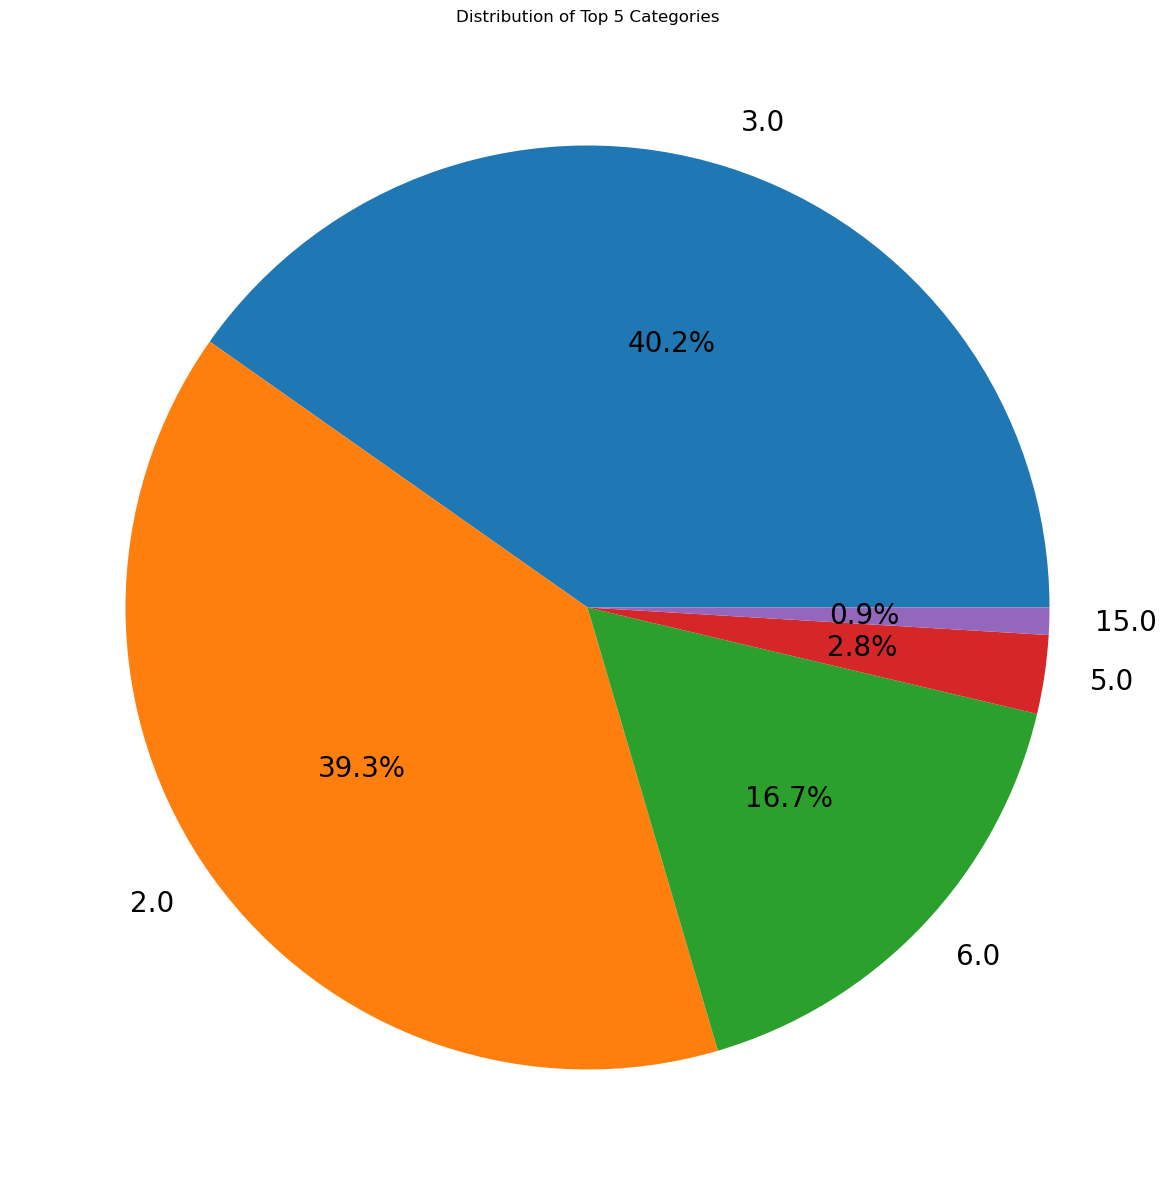

<Figure size 640x480 with 0 Axes>

In [106]:
# Distribution of categories
category_counts = df['category'].value_counts()

# Take the top 5 most distributed categories
top_5_category_counts = category_counts.nlargest(5)

# Pie chart for distribution of the top 5 categories
plt.figure(figsize=(15, 15))
plt.pie(top_5_category_counts, labels=top_5_category_counts.index, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.title('Distribution of Top 5 Categories')
plt.show()
plt.savefig('/Users/leodanilov/Downloads/top_5_categories_distribution.png', bbox_inches='tight')

In [107]:
# df['category'].unique
# category_counts

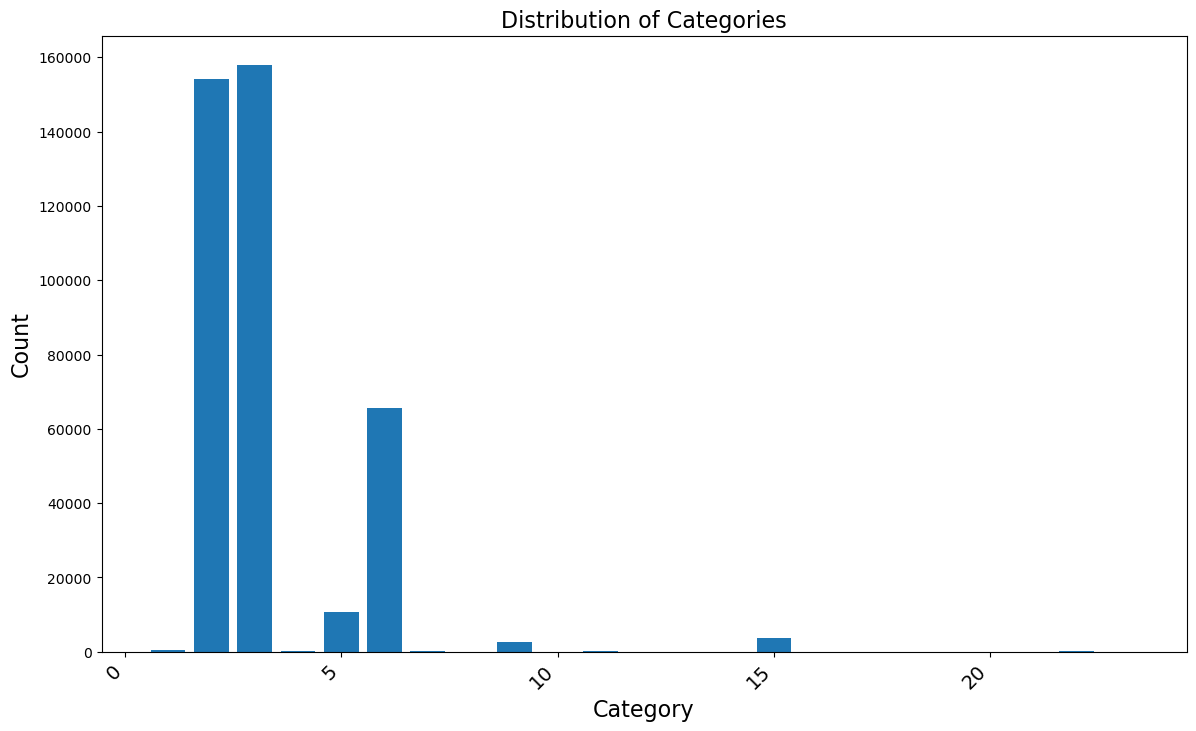

In [108]:
# Histogram of the distribution of categories
plt.figure(figsize=(14, 8))
plt.bar(category_counts.index, category_counts.values)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Distribution of Categories', fontsize=16)
# plt.axhline(y=category_counts.values.mean(), color='red', linestyle='--')  
plt.show()

# <p style="font-family: Arial; font-size:1em;color:blue;"> Categorical Variables Transformation. Part 2 </p>

In [109]:
# Define the mapping based on the order of the categories 'exclusive_marketer' 'agent' 'normal_marketer' 'owner
advertiser_type_mapping = {'owner': 1, 'agent': 2, 'normal_marketer': 3, 'exclusive_marketer': 4}

# Apply the mapping to the DataFrame
df['advertiser_type'] = df['advertiser_type'].map(advertiser_type_mapping)

# Print the updated DataFrame
df

/var/folders/qj/f7ng8fvn4fg2pj2h7wc6s4940000gn/T/ipykernel_8365/2324295013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['advertiser_type'] = df['advertiser_type'].map(advertiser_type_mapping)


,id,title,price,refresh,category,beds,livings,wc,area,street_width,...,user.review,user.iam_verified,city,city_id,district,district_id,width,length,advertiser_type,review_category
2248,2343359,بيت للبيع في شارع احمد الخفاجي ، حي سلطانة ، ا...,300000.0,1.671092e+09,9.0,5.0,1.0,5.0,185.0,10.0,...,4.86,1.0,الرياض,21,حي سلطانة,672.0,15.0,20.0,4,4
2252,2344888,أرض للبيع في طريق الكورنيش ، حي المرجان ، جدة ...,9900000.0,1.674911e+09,2.0,0.0,0.0,0.0,1800.0,35.0,...,4.61,1.0,جدة,66,حي المرجان,3584.0,25.0,35.0,4,4
2264,2351083,أرض للإيجار في شارع الغرارة ، حي القادسية ، ال...,400000.0,1.672495e+09,15.0,0.0,0.0,0.0,2400.0,30.0,...,4.56,1.0,الرياض,21,حي القادسية,530.0,48.0,50.0,2,4
2265,2351089,أرض للبيع في طريق الامير عبدالرحمن بن سعود ، ح...,3060000.0,1.671728e+09,2.0,0.0,0.0,0.0,1800.0,40.0,...,4.35,1.0,الرياض,21,حي طويق,682.0,12.0,20.0,3,4
2267,2351195,فيلا للبيع في شارع ابن المغازلي ، حي الملز ، ا...,1300000.0,1.671999e+09,3.0,7.0,2.0,5.0,660.0,10.0,...,4.86,1.0,الرياض,21,حي الملز,568.0,20.0,23.0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778744,5490433,أرض للبيع في حي ورقان ، المدينة المنورة ، امار...,550000.0,1.691172e+09,2.0,0.0,0.0,0.0,391.0,20.0,...,4.56,1.0,المدينة المنورة,41,حي ورقان,3088.0,20.0,28.0,2,4
778747,5490436,أرض للبيع في الدمام,1250000.0,1.691172e+09,2.0,0.0,0.0,0.0,625.0,20.0,...,4.58,1.0,الدمام,18,حي جامعة الدمام,1314.0,25.0,25.0,2,4
778749,5490438,أرض للبيع في الخبر,1120350.0,1.691173e+09,2.0,0.0,0.0,0.0,679.0,15.0,...,5.00,1.0,الخبر,12,حي البحر,1048.0,679.0,1.0,3,4
778750,5490440,أرض للبيع في شارع 11ب ، حي الكوثر ، الخبر ، الخبر,850000.0,1.691173e+09,2.0,0.0,0.0,0.0,875.0,15.0,...,5.00,1.0,الخبر,12,حي الكوثر,1100.0,875.0,1.0,3,4


# <p style="font-family: Arial; font-size:0.7em;color:white;"> After a hard research, I've found what values in 'street_direction': 1 - North, 2 - East,  3 - West, 4 - South, 5 - North-East, 6 - South-East, 7 - South-West, 8 - North-West, 9 - 3 streets, 10 - 4 streets </p>


# <p style="font-family: Arial; font-size:1em;color:blue;"> Model Construction </p>

In [110]:
# Drop unnecessary columns
final_dataframe = df.drop(columns=['id', 'title', 'refresh', 'last_update', 'location.lat', 'location.lng', 'user.review', 'city', 'district'])
final_dataframe

,price,category,beds,livings,wc,area,street_width,age,street_direction,ketchen,furnished,user.iam_verified,city_id,district_id,width,length,advertiser_type,review_category
2248,300000.0,9.0,5.0,1.0,5.0,185.0,10.0,36.0,1.0,1.0,0.0,1.0,21,672.0,15.0,20.0,4,4
2252,9900000.0,2.0,0.0,0.0,0.0,1800.0,35.0,0.0,7.0,0.0,0.0,1.0,66,3584.0,25.0,35.0,4,4
2264,400000.0,15.0,0.0,0.0,0.0,2400.0,30.0,0.0,3.0,0.0,0.0,1.0,21,530.0,48.0,50.0,2,4
2265,3060000.0,2.0,0.0,0.0,0.0,1800.0,40.0,0.0,2.0,0.0,0.0,1.0,21,682.0,12.0,20.0,3,4
2267,1300000.0,3.0,7.0,2.0,5.0,660.0,10.0,36.0,1.0,1.0,0.0,1.0,21,568.0,20.0,23.0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778744,550000.0,2.0,0.0,0.0,0.0,391.0,20.0,0.0,3.0,0.0,0.0,1.0,41,3088.0,20.0,28.0,2,4
778747,1250000.0,2.0,0.0,0.0,0.0,625.0,20.0,0.0,2.0,0.0,0.0,1.0,18,1314.0,25.0,25.0,2,4
778749,1120350.0,2.0,0.0,0.0,0.0,679.0,15.0,0.0,1.0,0.0,0.0,1.0,12,1048.0,679.0,1.0,3,4
778750,850000.0,2.0,0.0,0.0,0.0,875.0,15.0,0.0,2.0,0.0,0.0,1.0,12,1100.0,875.0,1.0,3,4


In [111]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold,  GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

In [112]:
final_dataframe['city_id'] = final_dataframe['city_id'].astype(str)
final_dataframe['district_id'] = final_dataframe['district_id'].astype(str)
final_dataframe['length'] = final_dataframe['length'].astype(float)

# Select features and target (deleted ketchen, furnished, wc)
features = ['category', 'beds', 'livings', 'area', 'street_width', 'age', 'street_direction', 'user.iam_verified', 'city_id', 'district_id', 'width', 'length', 'advertiser_type', 'review_category']
target = 'price'

X = final_dataframe[features]
y = final_dataframe[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = ['area', 'age', 'street_width', 'width', 'length']
ordinal_features = ['review_category', 'advertiser_type', 'beds', 'livings']
nominal_features = ['category', 'street_direction', 'city_id', 'district_id']
binary_features = ['user.iam_verified']

# Preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(dtype=np.float64))])

nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Column transformer to apply appropriate transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('nom', nominal_transformer, nominal_features),
        ('bin', 'passthrough', binary_features)])

# Construct and evaluate a baseline linear regression model
linear_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])

linear_model.fit(X_train, y_train)
linear_score = linear_model.score(X_test, y_test)

print(f'Linear Regression R^2 Score: {linear_score:.2f}')

# Construct and evaluate a Ridge regression model
ridge_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', Ridge(alpha=1.0))])

ridge_model.fit(X_train, y_train)
ridge_score = ridge_model.score(X_test, y_test)

print(f'Ridge Regression R^2 Score: {ridge_score:.2f}')

Linear Regression R^2 Score: 0.23
Ridge Regression R^2 Score: 0.23


In [113]:
# Get residuals
y_pred = linear_model.predict(X_test)
residuals = y_test - y_pred

# Error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 6709980.817770825
Root Mean Squared Error (RMSE): 83195514.20479581


In [114]:
# Get residuals
y_pred = ridge_model.predict(X_test)
residuals = y_test - y_pred

# Error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 6698093.510136989
Root Mean Squared Error (RMSE): 83231525.15211228


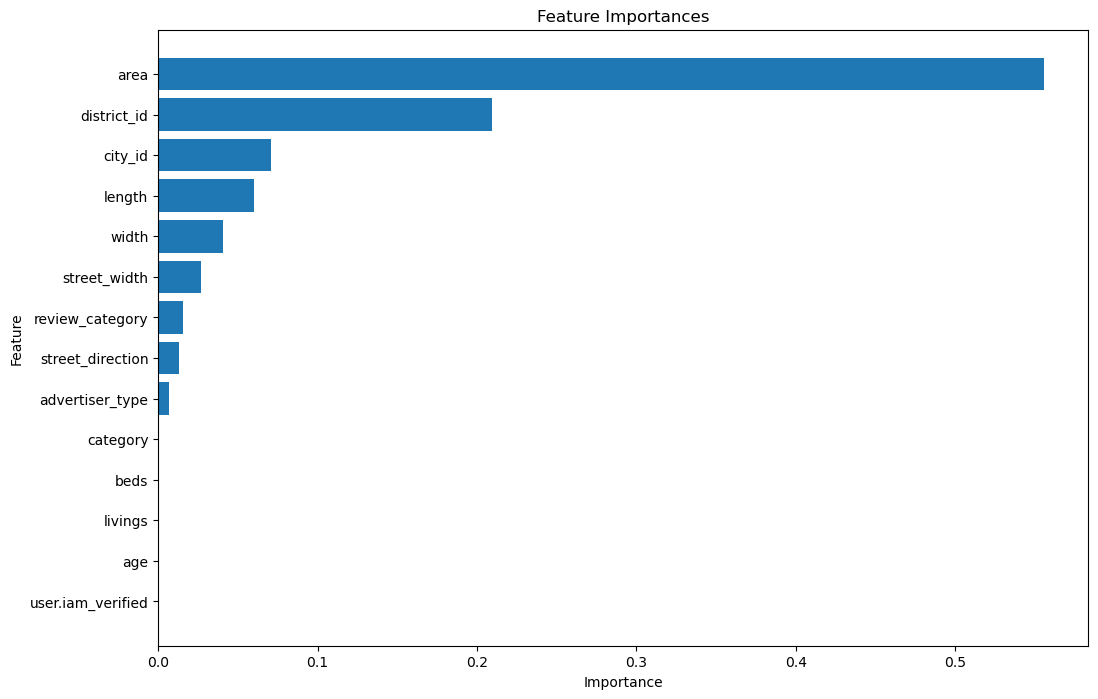

,Feature,Importance
3,area,0.555697
9,district_id,0.209439
8,city_id,0.070949
11,length,0.059822
10,width,0.040408
4,street_width,0.026924
13,review_category,0.015440
6,street_direction,0.013066
12,advertiser_type,0.006551
0,category,0.000837


In [115]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
features = X_train.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort and display feature importances
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Display the feature importances
feature_importances

In [116]:
# Convert columns to appropriate data types
final_dataframe['city_id'] = final_dataframe['city_id'].astype(str)
final_dataframe['district_id'] = final_dataframe['district_id'].astype(str)
final_dataframe['length'] = final_dataframe['length'].astype(float)

# Select reduced features and target
features_to_keep = ['area', 'district_id', 'city_id', 'length', 'width', 'street_width', 'review_category', 'street_direction']
target = 'price'

X = final_dataframe[features_to_keep]
y = final_dataframe[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for the reduced feature set
numeric_features_reduced = ['area', 'length', 'width', 'street_width']
ordinal_features_reduced = ['review_category']
nominal_features_reduced = ['district_id', 'city_id', 'street_direction']

# Preprocessing pipelines for the reduced feature set
numeric_transformer_reduced = Pipeline(steps=[
    ('scaler', StandardScaler())])

ordinal_transformer_reduced = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(dtype=np.float64))])

nominal_transformer_reduced = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Column transformer to apply appropriate transformations to the reduced feature set
preprocessor_reduced = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_reduced, numeric_features_reduced),
        ('ord', ordinal_transformer_reduced, ordinal_features_reduced),
        ('nom', nominal_transformer_reduced, nominal_features_reduced)])

# Construct and evaluate a Gradient Boosting model with the reduced feature set
gb_model = Pipeline(steps=[('preprocessor', preprocessor_reduced),
                           ('regressor', GradientBoostingRegressor(random_state=42))])

# Fit and evaluate the model with the reduced feature set
gb_model.fit(X_train, y_train)
gb_score = gb_model.score(X_test, y_test)

print(f'Gradient Boosting R^2 Score: {gb_score:.2f}')

Gradient Boosting R^2 Score: 0.47


In [117]:
# Get residuals
y_pred = gb_model.predict(X_test)
residuals = y_test - y_pred

# Error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 3676492.274385084
Root Mean Squared Error (RMSE): 69359589.02626628


In [51]:
# Function to manually tune hyperparameters
def tune_gradient_boosting(n_estimators, learning_rate, max_depth, min_samples_split, min_samples_leaf):
    gb_model = Pipeline(steps=[('preprocessor', preprocessor_reduced),
                               ('regressor', GradientBoostingRegressor(
                                   n_estimators=n_estimators,
                                   learning_rate=learning_rate,
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   random_state=42))])
    gb_model.fit(X_train, y_train)
    score = gb_model.score(X_test, y_test)
    print(f'Gradient Boosting R^2 Score: {score:.2f}')
    return score

# Example of manually tuning hyperparameters
best_score = -np.inf
best_params = {}

for n_estimators in [100, 200, 300]:
    for learning_rate in [0.01, 0.1, 0.2]:
        for max_depth in [3, 4, 5]:
            for min_samples_split in [2, 5, 10]:
                for min_samples_leaf in [1, 2, 4]:
                    print(f'Trying n_estimators={n_estimators}, learning_rate={learning_rate}, max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}')
                    score = tune_gradient_boosting(n_estimators, learning_rate, max_depth, min_samples_split, min_samples_leaf)
                    if score > best_score:
                        best_score = score
                        best_params = {
                            'n_estimators': n_estimators,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf
                        }

print(f'Best Gradient Boosting R^2 Score: {best_score:.2f}')
print(f'Best Parameters: {best_params}')


Trying n_estimators=100, learning_rate=0.01, max_depth=3, min_samples_split=2, min_samples_leaf=1
Gradient Boosting R^2 Score: 0.37
Trying n_estimators=100, learning_rate=0.01, max_depth=3, min_samples_split=2, min_samples_leaf=2
Gradient Boosting R^2 Score: 0.36
Trying n_estimators=100, learning_rate=0.01, max_depth=3, min_samples_split=2, min_samples_leaf=4
Gradient Boosting R^2 Score: 0.36
Trying n_estimators=100, learning_rate=0.01, max_depth=3, min_samples_split=5, min_samples_leaf=1
Gradient Boosting R^2 Score: 0.37
Trying n_estimators=100, learning_rate=0.01, max_depth=3, min_samples_split=5, min_samples_leaf=2
Gradient Boosting R^2 Score: 0.36
Trying n_estimators=100, learning_rate=0.01, max_depth=3, min_samples_split=5, min_samples_leaf=4
Gradient Boosting R^2 Score: 0.36
Trying n_estimators=100, learning_rate=0.01, max_depth=3, min_samples_split=10, min_samples_leaf=1
Gradient Boosting R^2 Score: 0.37
Trying n_estimators=100, learning_rate=0.01, max_depth=3, min_samples_split

In [118]:
# Define the Gradient Boosting model with manually tuned hyperparameters
gb_model = Pipeline(steps=[('preprocessor', preprocessor_reduced),
                           ('regressor', GradientBoostingRegressor(
                               n_estimators=300,
                               learning_rate=0.2,
                               max_depth=4,
                               min_samples_split=2,
                               min_samples_leaf=4,
                               random_state=42))])

# Fit and evaluate the model with the reduced feature set
gb_model.fit(X_train, y_train)
gb_score = gb_model.score(X_test, y_test)

print(f'Gradient Boosting R^2 Score: {gb_score:.2f}')

# Perform cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(gb_model, X, y, cv=cv, scoring='r2')

# Print cross-validation results
print(f'Cross-Validation R^2 Scores: {cv_scores}')
print(f'Mean R^2 Score: {cv_scores.mean():.2f}')
print(f'Standard Deviation of R^2 Scores: {cv_scores.std():.2f}')

Gradient Boosting R^2 Score: 0.60
Cross-Validation R^2 Scores: [0.51708249 0.76002879 0.41827583 0.51677415 0.73726183 0.62621088
 0.80329591 0.48711439 0.72566531 0.78030202]
Mean R^2 Score: 0.64
Standard Deviation of R^2 Scores: 0.13


In [119]:
# Get residuals
y_pred = gb_model.predict(X_test)
residuals = y_test - y_pred

# Error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 2793248.220941447
Root Mean Squared Error (RMSE): 60103987.43799899


In [120]:
# Define the XGBoost model with manually tuned hyperparameters
xgb_model = Pipeline(steps=[('preprocessor', preprocessor_reduced),
                            ('regressor', xgb.XGBRegressor(
                                n_estimators=300,
                                learning_rate=0.2,
                                max_depth=4,
                                min_child_weight=4,
                                subsample=1.0,
                                colsample_bytree=1.0,
                                objective='reg:squarederror',
                                random_state=42))])

# Train the model
xgb_model.fit(X_train, y_train)

# Evaluate the model
xgb_score = xgb_model.score(X_test, y_test)
print(f'XGBoost R^2 Score: {xgb_score:.2f}')

# Perform cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_model, X, y, cv=cv, scoring='r2')

# Print cross-validation results
print(f'Cross-Validation R^2 Scores: {cv_scores}')
print(f'Mean R^2 Score: {cv_scores.mean():.2f}')
print(f'Standard Deviation of R^2 Scores: {cv_scores.std():.2f}')

XGBoost R^2 Score: 0.27
Cross-Validation R^2 Scores: [0.24245785 0.49964822 0.35732343 0.26472542 0.55240214 0.34206714
 0.42921886 0.43777673 0.35434931 0.38793523]
Mean R^2 Score: 0.39
Standard Deviation of R^2 Scores: 0.09


In [121]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define the XGBoost model with manually tuned hyperparameters
xgb_model = Pipeline(steps=[('preprocessor', preprocessor_reduced),
                            ('regressor', xgb.XGBRegressor(
                                n_estimators=300,
                                learning_rate=0.2,
                                max_depth=4,
                                min_child_weight=4,
                                subsample=1.0,
                                colsample_bytree=1.0,
                                objective='reg:squarederror',
                                random_state=42))])

# Fit and evaluate the model with the reduced feature set
xgb_model.fit(X_train, y_train)
xgb_score = xgb_model.score(X_test, y_test)

print(f'XGBoost R^2 Score: {xgb_score:.2f}')

# Perform cross-validation
cv_scores_xgb = cross_val_score(xgb_model, X, y, cv=cv, scoring='r2')

# Print cross-validation results
print(f'Cross-Validation R^2 Scores for XGBoost: {cv_scores_xgb}')
print(f'Mean R^2 Score for XGBoost: {cv_scores_xgb.mean():.2f}')
print(f'Standard Deviation of R^2 Scores for XGBoost: {cv_scores_xgb.std():.2f}')

XGBoost R^2 Score: 0.27
Cross-Validation R^2 Scores for XGBoost: [0.24245785 0.49964822 0.35732343 0.26472542 0.55240214 0.34206714
 0.42921886 0.43777673 0.35434931 0.38793523]
Mean R^2 Score for XGBoost: 0.39
Standard Deviation of R^2 Scores for XGBoost: 0.09


In [ ]:
# Define the XGBoost model
xgb_model = Pipeline(steps=[('preprocessor', preprocessor_reduced),
                            ('regressor', xgb.XGBRegressor(
                                objective='reg:squarederror',
                                random_state=42))])

# Define the parameter grid for RandomizedSearchCV
param_dist_xgb = {
    'regressor__n_estimators': [100, 200, 300, 400],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5, 6],
    'regressor__min_child_weight': [1, 2, 4, 6],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform Randomized Search for hyperparameter tuning
random_search_xgb = RandomizedSearchCV(xgb_model, param_dist_xgb, n_iter=50, cv=5, n_jobs=-1, scoring='r2', random_state=42)
random_search_xgb.fit(X_train, y_train)

# Get the best estimator and its performance
best_xgb_model = random_search_xgb.best_estimator_
best_xgb_score = best_xgb_model.score(X_test, y_test)

print(f'Best XGBoost R^2 Score after Randomized Search: {best_xgb_score:.2f}')
print(f'Best Hyperparameters: {random_search_xgb.best_params_}')

# Perform cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_xgb = cross_val_score(best_xgb_model, X, y, cv=cv, scoring='r2')

# Print cross-validation results
print(f'Cross-Validation R^2 Scores for XGBoost: {cv_scores_xgb}')
print(f'Mean R^2 Score for XGBoost: {cv_scores_xgb.mean():.2f}')
print(f'Standard Deviation of R^2 Scores for XGBoost: {cv_scores_xgb.std():.2f}')

Best XGBoost R^2 Score after Randomized Search: 0.29
Best Hyperparameters: {'regressor__subsample': 1.0, 'regressor__n_estimators': 300, 'regressor__min_child_weight': 1, 'regressor__max_depth': 4, 'regressor__learning_rate': 0.1, 'regressor__colsample_bytree': 0.6}


In [ ]:
# Get residuals
y_pred = best_xgb_model.predict(X_test)
residuals = y_test - y_pred

# Error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

In [ ]:
from catboost import CatBoostRegressor

# Define the CatBoost model with similar hyperparameters
catboost_model = Pipeline(steps=[('preprocessor', preprocessor_reduced),
                                 ('regressor', CatBoostRegressor(
                                     iterations=300,
                                     learning_rate=0.2,
                                     depth=4,
                                     random_seed=42,
                                     silent=True))])

# Fit and evaluate the model with the reduced feature set
catboost_model.fit(X_train, y_train)
catboost_score = catboost_model.score(X_test, y_test)

print(f'CatBoost R^2 Score: {catboost_score:.2f}')

# Perform cross-validation
cv_scores_catboost = cross_val_score(catboost_model, X, y, cv=cv, scoring='r2')

# Print cross-validation results
print(f'Cross-Validation R^2 Scores for CatBoost: {cv_scores_catboost}')
print(f'Mean R^2 Score for CatBoost: {cv_scores_catboost.mean():.2f}')
print(f'Standard Deviation of R^2 Scores for CatBoost: {cv_scores_catboost.std():.2f}')

In [ ]:
# Get residuals
y_pred = catboost_model.predict(X_test)
residuals = y_test - y_pred

# Error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

# <p style="font-family: Arial; font-size:1em;color:blue;"> Model Evaluation </p>

In [69]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

Durbin-Watson statistic: 1.9998114659871427


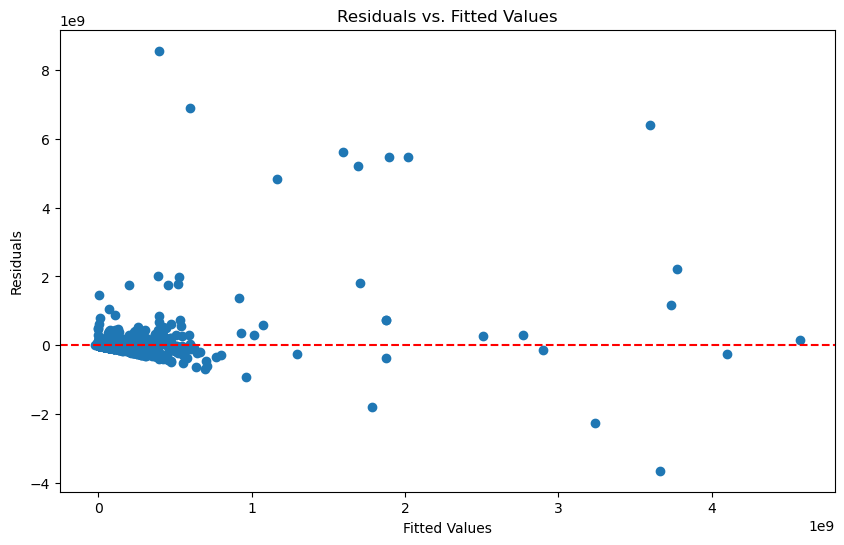

In [150]:
from statsmodels.stats.stattools import durbin_watson

# Get residuals
y_pred = gb_model.predict(X_test)
residuals = y_test - y_pred

# Perform Durbin-Watson test
dw = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw}')

# Residuals vs. fitted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.savefig('/Users/leodanilov/Downloads/Durbin_Watson.png', bbox_inches='tight')
plt.show()

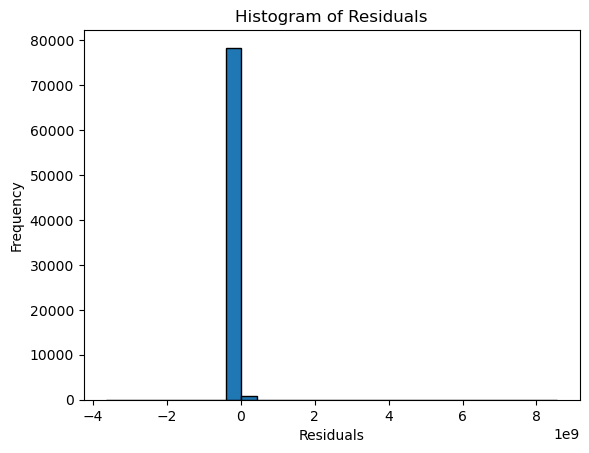

In [151]:
# Histogram of residuals
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [153]:
# Goodness-of-fit metrics
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X.shape[1] - 1)
print(f'R-squared: {r2:.2f}')
print(f'Adjusted R-squared: {adj_r2:.2f}')

R-squared: 0.47
Adjusted R-squared: 0.47


In [154]:
print(X.dtypes)
X = X.apply(pd.to_numeric, errors='coerce')
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [
        1 / (1 - LinearRegression().fit(X.drop(columns=[col]), X[col]).score(X.drop(columns=[col]), X[col]))
        for col in X.columns
    ]
    return vif_data

# Assuming X is your DataFrame of predictors
vif_data = calculate_vif(X)
print(vif_data)


area                 float64
district_id           object
city_id               object
length               float64
width                float64
street_width         float64
review_category     category
street_direction     float64
dtype: object
            feature       VIF
0              area  1.002313
1       district_id  2.978171
2           city_id  2.961325
3            length  1.060740
4             width  1.060775
5      street_width  1.014331
6   review_category  1.013360
7  street_direction  1.019346


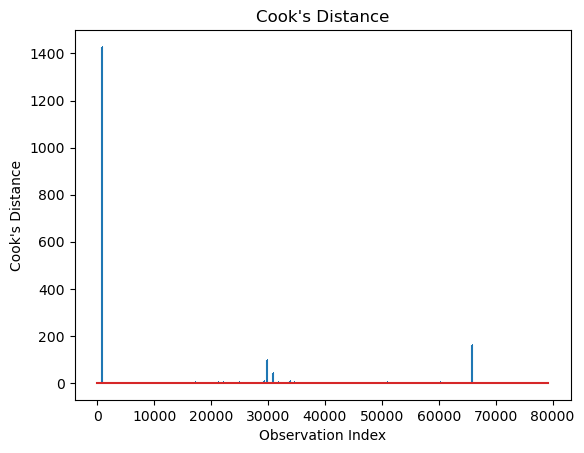

In [155]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Ensure y_test and X are aligned
X = X.loc[y_test.index]

# Cook's Distance
influence = sm.OLS(y_test, sm.add_constant(X)).fit().get_influence()
cooks_d = influence.cooks_distance
plt.stem(np.arange(len(cooks_d[0])), cooks_d[0], markerfmt=",")
plt.title("Cook's Distance")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.savefig('/Users/leodanilov/Downloads/Cook_Dist.png', bbox_inches='tight')
plt.show()

In [63]:
# Breusch-Pagan test
bp_test = het_breuschpagan(residuals, sm.add_constant(y_pred))
print('Breusch-Pagan test statistic:', bp_test[0])
print('Breusch-Pagan test p-value:', bp_test[1])

Breusch-Pagan test statistic: 10981.286604260124
Breusch-Pagan test p-value: 0.0
